In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | saint-augustin
Processing Record 3 of Set 1 | jalu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | tayzhina
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | port-gentil
Processing Record 12 of Set 1 | chivay
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | fort nelson
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | ugoofaaru
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | banjar
Processing Record 21 of Set 1 | yellowknife
Processing R

Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | atambua
Processing Record 43 of Set 4 | suzu
City not found. Skipping...
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | batagay-alyta
Processing Record 47 of Set 4 | saumur
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | dubti
Processing Record 50 of Set 4 | shimoda
Processing Record 1 of Set 5 | chama
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | camopi
Processing Record 6 of Set 5 | camana
Processing Record 7 of Set 5 | nelson bay
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of

Processing Record 29 of Set 8 | merauke
Processing Record 30 of Set 8 | garhakota
Processing Record 31 of Set 8 | goffstown
Processing Record 32 of Set 8 | kanniyakumari
Processing Record 33 of Set 8 | morondava
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | mixtepec
City not found. Skipping...
Processing Record 36 of Set 8 | goderich
Processing Record 37 of Set 8 | puerto berrio
Processing Record 38 of Set 8 | biltine
Processing Record 39 of Set 8 | boende
Processing Record 40 of Set 8 | lejanias
Processing Record 41 of Set 8 | cardston
Processing Record 42 of Set 8 | amapa
Processing Record 43 of Set 8 | tapaua
City not found. Skipping...
Processing Record 44 of Set 8 | lodja
Processing Record 45 of Set 8 | barra da estiva
Processing Record 46 of Set 8 | balkanabat
Processing Record 47 of Set 8 | winnemucca
Processing Record 48 of Set 8 | manokwari
Processing Record 49 of Set 8 | hervey bay
Processing Record 50 of Set 8 | khlung
Processing Record 1 of Set 9 |

Processing Record 18 of Set 12 | barcelona
Processing Record 19 of Set 12 | kerugoya
Processing Record 20 of Set 12 | sao sebastiao
Processing Record 21 of Set 12 | waipawa
Processing Record 22 of Set 12 | mitsamiouli
Processing Record 23 of Set 12 | rio gallegos
Processing Record 24 of Set 12 | nizhniy tsasuchey
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | cayenne
Processing Record 27 of Set 12 | oksovskiy
Processing Record 28 of Set 12 | aldergrove
Processing Record 29 of Set 12 | oudtshoorn
Processing Record 30 of Set 12 | doka
Processing Record 31 of Set 12 | fonte boa
Processing Record 32 of Set 12 | erdenet
Processing Record 33 of Set 12 | norman wells
Processing Record 34 of Set 12 | mangrol
Processing Record 35 of Set 12 | sinjar
Processing Record 36 of Set 12 | kulachi
Processing Record 37 of Set 12 | sioux lookout
Processing Record 38 of Set 12 | maghama
City not found. Skipping...
Processing Record 39 of Set 12 | klaksvik
Processing Record 40 o

In [34]:
len(city_data)

560

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,55.00,81,92,3.00,AU,2020-08-18 05:32:59
1,Saint-Augustin,51.23,-58.65,53.80,91,0,1.45,CA,2020-08-18 05:33:25
2,Jalu,29.03,21.55,79.50,52,0,7.45,LY,2020-08-18 05:33:25
3,Ushuaia,-54.80,-68.30,31.42,96,97,4.41,AR,2020-08-18 05:31:19
4,Jamestown,42.10,-79.24,61.00,100,75,2.28,US,2020-08-18 05:31:57
5,Punta Arenas,-53.15,-70.92,32.00,90,26,16.11,CL,2020-08-18 05:33:26
6,Tuktoyaktuk,69.45,-133.04,50.00,93,75,10.29,CA,2020-08-18 05:33:26
7,Bluff,-46.60,168.33,46.24,71,100,5.37,NZ,2020-08-18 05:33:03
8,Tayzhina,53.67,87.44,80.58,39,34,6.04,RU,2020-08-18 05:33:26
9,Port-Gentil,-0.72,8.78,77.00,88,90,10.40,GA,2020-08-18 05:33:26


In [36]:
new_col_ord = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_ord]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2020-08-18 05:32:59,-42.78,147.06,55.00,81,92,3.00
1,Saint-Augustin,CA,2020-08-18 05:33:25,51.23,-58.65,53.80,91,0,1.45
2,Jalu,LY,2020-08-18 05:33:25,29.03,21.55,79.50,52,0,7.45
3,Ushuaia,AR,2020-08-18 05:31:19,-54.80,-68.30,31.42,96,97,4.41
4,Jamestown,US,2020-08-18 05:31:57,42.10,-79.24,61.00,100,75,2.28
...,...,...,...,...,...,...,...,...,...
555,Hede,CN,2020-08-18 05:35:28,33.77,120.25,90.50,73,0,8.23
556,Chulman,RU,2020-08-18 05:35:28,56.85,124.91,53.85,58,69,11.41
557,San Pablo,PH,2020-08-18 05:35:28,14.07,121.33,87.80,66,99,5.82
558,Brawley,US,2020-08-18 05:35:28,32.98,-115.53,102.20,26,20,5.82


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597730433.4545672

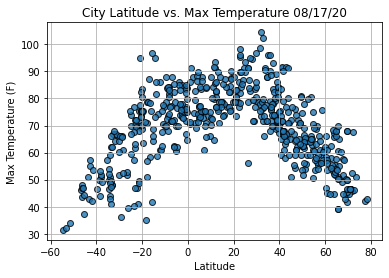

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

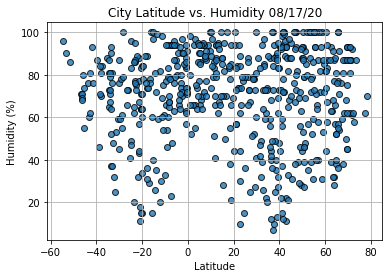

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

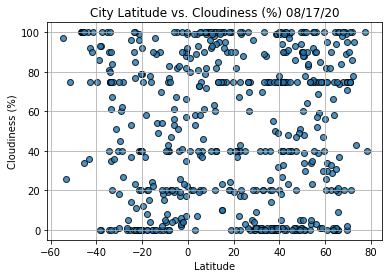

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

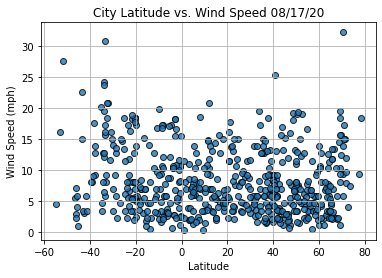

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()